In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Performed Without Matrices

In [2]:
t = np.array([ 0.        ,  0.28571429,  0.57142857,  0.85714286,  1.14285714,
        1.42857143,  1.71428571,  2.        ,  2.28571429,  2.57142857,
        2.85714286,  3.14285714,  3.42857143,  3.71428571,  4.        ,
        4.28571429,  4.57142857,  4.85714286,  5.14285714,  5.42857143,
        5.71428571,  6.        ,  6.28571429,  6.57142857,  6.85714286,
        7.14285714,  7.42857143,  7.71428571,  8.        ,  8.28571429,
        8.57142857,  8.85714286,  9.14285714,  9.42857143,  9.71428571,
       10.        ])

x = np.array([-0.55013384,  4.21913419, -6.21384396,  7.90886492, -1.92290566,
       -8.49142001,  5.05876526,  9.94668285,  6.01105072,  0.58572846,
        1.54073511,  8.55082559, -4.81249862,  9.88154545,  9.91919313,
        7.89088277,  8.02616354, -2.42846214,  1.11584093, -3.02837841,
       -2.91533653, -5.48190116,  2.18216626, -3.79899026,  5.72123396,
        4.95099935, -5.02136422,  6.72154099, -8.2871659 ,  3.67577668,
       -3.49687551,  0.96070283,  4.18457376,  5.1350588 ,  1.36111153,
        8.06378947])

y = np.array([-9.65762628, -5.63506725,  8.92821226,  8.26816694,  0.58332338,
        3.99090873,  9.77938773, -7.77703504, -9.0157463 , -9.82349658,
        4.87370407,  1.4268323 ,  7.06044828, -9.33920731, -5.13380425,
        2.38871189, -4.48811803, -3.20796886, -2.67383133,  1.8025521 ,
        0.08255342,  7.3215833 ,  4.79427979,  7.30804367,  7.29302258,
       -0.8797028 ,  4.52943218,  1.47639643, -4.59686511, -2.54488153,
       -1.81666707,  2.06496457, -6.77844598, -5.94649027,  7.25313012,
       -4.66048336])

z = np.array([ 122.78822581,   99.45935505, -195.70525119,  -78.80330908,
        -31.31828562, -128.47934701, -113.86292238,  191.88066799,
        184.88082032,  160.09030923,  -53.53902916,   53.39303372,
       -127.34897133,  232.89552992,  172.18392179,   45.87676884,
        154.28429528,   61.1204128 ,   81.9685648 ,  -13.674419  ,
         16.2223973 , -109.66795171,  -12.1095462 ,  -91.2041394 ,
        -18.28709988,  103.56516512,  -49.14232449,   86.48136953,
         71.4106208 ,  131.13917544,   70.46948748,   46.96087298,
        208.13614276,  205.48079186,  -20.00261471,  213.25388402])

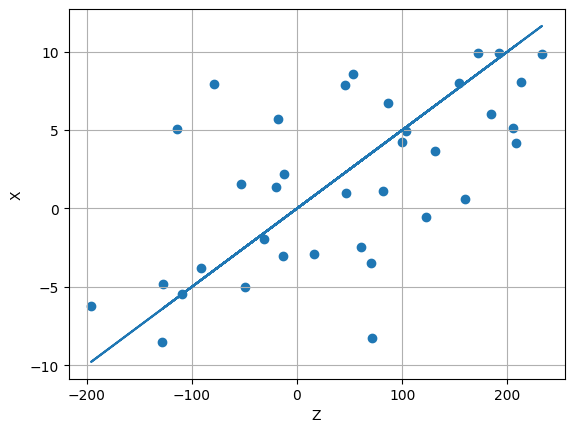

In [3]:
plt.scatter(z, x) # Plot x as a function of z
plt.grid(True) # Apply a grid
plt.xlabel('Z') # Apply an X label
plt.ylabel('X') # Apply a Y label

# Let's approximate w1
w1 = 0.05
plt.plot(z, w1*z) # This will plot the line on the same graph so I can play around with w1 to see what suits best

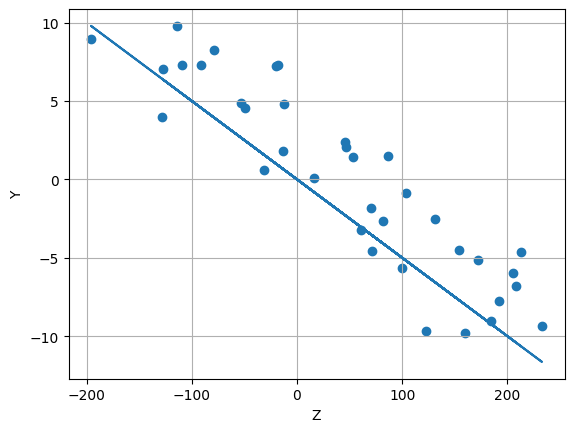

In [4]:
plt.scatter(z, y) # Plot y as a function of z
plt.grid(True) # Apply a grid
plt.xlabel('Z') # Apply an X label
plt.ylabel('Y') # Apply a Y label

# Let's approximate w2
w2 = -0.05
plt.plot(z, w2*z) # Plot a line and play around with w2

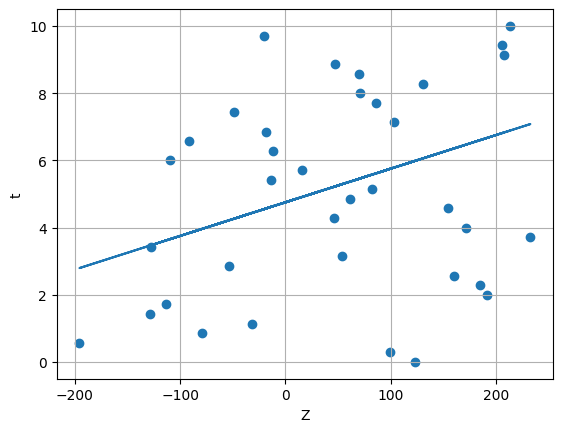

In [5]:
plt.scatter(z, t) # Plot t as a function of z
plt.grid(True) # Apply a grid
plt.xlabel('Z') # Apply an X label
plt.ylabel('t') # Apply a Y label

# Let's approximate w3 and b
w3 = 0.01
b = 4.75
plt.plot(z, w3*z + b) # Mess around with w3 to see when the line fits best

In [6]:
# Reinitialize parameters
w1 = 0.05
w2 = -0.05
w3 = 0.01
b = 4.75

def cost(t, x, y, z, w1, w2, w3, b):
    '''
        This function returns an array of the costs, in the order:
            [x as a function of z,
             y as a function of z,
             t as a function of z]
    '''

    return np.mean(
        (z - (w1*x + w2*y + w3*t + b))**2
    )

def dC_dw1(t, x, y, z, w1, w2, w3, b):
    return -2*np.mean( x*(z - (w1*x + w2*y + w3*t + b)) ) # The computed partial derivative with respect to w1

def dC_dw2(t, x, y, z, w1, w2, w3, b):
    return -2*np.mean( y*(z - (w1*x + w2*y + w3*t + b)) ) # The computed partial derivative with respect to w2

def dC_dw3(t, x, y, z, w1, w2, w3, b):
    return -2*np.mean( t*(z - (w1*x + w2*y + w3*t + b)) ) # The computed partial derivative with respect to w3

def dC_db(t, x, y, z, w1, w2, w3, b):
    return -2*np.mean( z - (w1*x + w2*y + w3*t + b) ) # The partial derivative with respect to b

def fit(t, x, y, z, n_steps, lr, w1_0, w2_0, w3_0, b_0):

    # Initialize parameters
    w1 = w1_0
    w2 = w2_0
    w3 = w3_0
    b = b_0

    # Initialize step-history arrays
    w1_steps = [w1]
    w2_steps = [w2]
    w3_steps = [w3]
    b_steps = [b]

    cost_steps = [cost(t, x, y, z, w1, w2, w3, b)] # Initialize cost steps array

    for i in range(n_steps):
        # Because of intersects between different parameters, we want to ensure we compute the partial derivatives on the unchanged values.
        new_w1 = w1 - lr*dC_dw1(t, x, y, z, w1, w2, w3, b)
        new_w2 = w2 - lr*dC_dw2(t, x, y, z, w1, w2, w3, b)
        new_w3 = w3 - lr*dC_dw3(t, x, y, z, w1, w2, w3, b)
        new_b = b - lr*dC_db(t, x, y, z, w1, w2, w3, b)

        # Update our variables
        w1 = new_w1
        w2 = new_w2
        w3 = new_w3
        b = new_b

        # Append the current steps' results into our lists
        w1_steps.append(w1)
        w2_steps.append(w2)
        w3_steps.append(w3)
        b_steps.append(b)

        cost_steps.append( cost(t, x, y, z, w1, w2, w3, b) ) # Append the current cost to the cost history array
    return w1, w2, w3, b, cost_steps, w1_steps, w2_steps, w3_steps, b_steps # Return evreything required

# Initialize additional parameters
lr = 0.01
n_steps = 1000

In [7]:
w1, w2, w3, b, cost_steps, w1_steps, w2_steps, w3_steps, b_steps = fit(t, x, y, z, n_steps, lr, w1, w2, w3, b) # Use our fit function

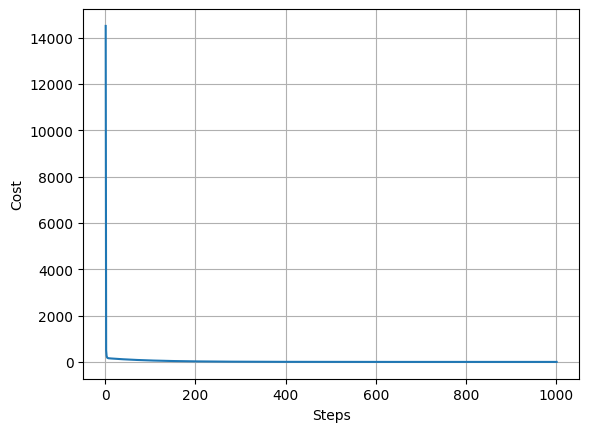

In [8]:
def format_plot(x_label, y_label):
    '''
        This function just simply simplifies the process of having to format a graph with a grid and axis labels.
    '''
    plt.grid(True) # Apply a grid
    plt.xlabel(x_label) # Apply the requested X label
    plt.ylabel(y_label) # Apply the requested Y label

steps = np.arange(1, n_steps + 2) # Initialize the steps array from 1 until the amount of steps (additional 1 because arange does 1 less, and 1 more because we count the initial conditions)
plt.plot(steps, cost_steps) # Plot the cost as a function of steps
format_plot('Steps', 'Cost') # Format our graph using our format function

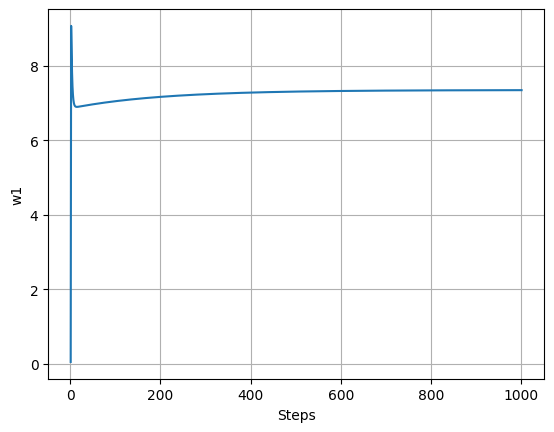

In [9]:
plt.plot(steps, w1_steps) # Plot w1 as a function of the steps
format_plot('Steps', 'w1') # Format our graph using our format function

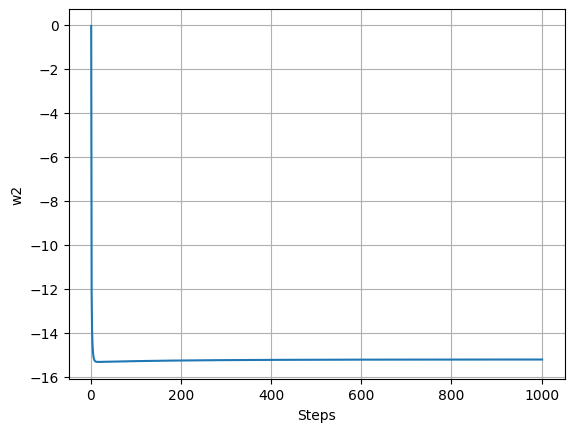

In [10]:
plt.plot(steps, w2_steps) # Plot w2 as a function of the steps
format_plot('Steps', 'w2') # Format our graph using our format function

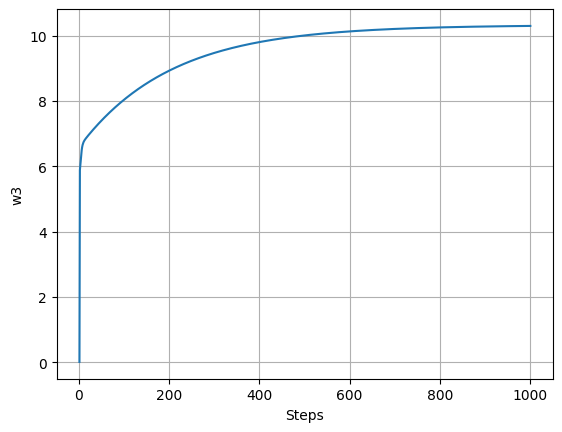

In [11]:
plt.plot(steps, w3_steps) # Plot w3 as a function of the steps
format_plot('Steps', 'w3') # Format our graph using our format function

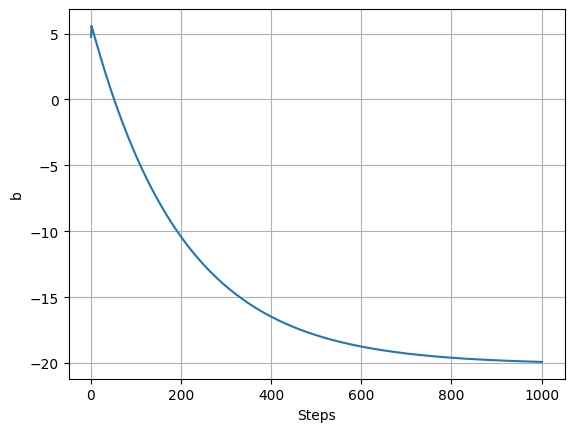

In [12]:
plt.plot(steps, b_steps) # Plot b as a function of the steps
format_plot('Steps', 'b') # Format our graph using our format function

In [13]:
print(f" w1 = {w1}\n w2 = {w2}\n w3 = {w3}\n b = {b}") # Output the results

 w1 = 7.343561592257833
 w2 = -15.208112580495571
 w3 = 10.301884696712596
 b = -19.914241094727767


# Performed With Matrices

In [14]:
w1 = 0.05
w2 = -0.05
w3 = 0.01
b = 4.75

def cost(w, b, X, z):
    """
    w: vector containing [w1, w2, w3]
    b: scalar
    X: matrix where every row is a measurement, columns are t, x, y
    z: vector of measuremnts
    """

    z_hat = np.dot(X, w) + b # Compute the predicted z in the formula
    return np.mean((z_hat - z)**2) # Return the calculated value

def dC_dw(w, b, X, z):
    z_hat = np.dot(X, w) + b # Compute the predicted z in the formula
    return 2 * np.transpose(X) @ ((z_hat - z)/len(z)) # Compute according to the formula, the @ serves to multiply matrices alongside other matrices/vectors

def dC_db(w, b, X, z):
    z_hat = np.dot(X, w) + b # Compute the predicted z in the formula
    return 2*np.mean(z_hat - z) # Compute the formula

def fit(X, z, n_steps, lr, w0, b0):
    """
    w0: vector containing initial guesses for [w1, w2, w3]
    b0: scalar
    """

    # Initialize parameters
    w = w0
    b = b0

    # Initialize history arrays
    cost_steps = [ cost(w, b, X, z) ]
    w_steps = [[w0[0]], [w0[1]], [w0[2]]]
    b_steps = [b]

    for i in range(n_steps): # Complete n iterations
        new_w = w - lr*dC_dw(w, b, X, z) # Compute our new w vector
        new_b = b - lr*dC_db(w, b, X, z) # Compute our new b scalar

        # Update parameters
        w = new_w
        b = new_b

        # Update history arrays
        cost_steps.append( cost(w, b, X, z) )
        b_steps.append(b)

        w_steps[0].append(w[0]) # We store in the 1st spot in the w array the w1 history
        w_steps[1].append(w[1]) # We store in the 2nd spot in the w array the w2 history
        w_steps[2].append(w[2]) # We store in the 3rd spot in the w array the w3 history
    return w, b, cost_steps, w_steps, b_steps # Return all required results

# Initialize additional parameters
n_steps = 1000
lr = 0.01

In [15]:
w, b, cost_steps, w_steps, b_steps = fit( np.column_stack((x, y, t)), z, n_steps, lr, np.array([w1, w2, w3]), b ) # Use our most recent fit function
# We use columns x, y, t to easily extract w1, w2, w3 in proper order

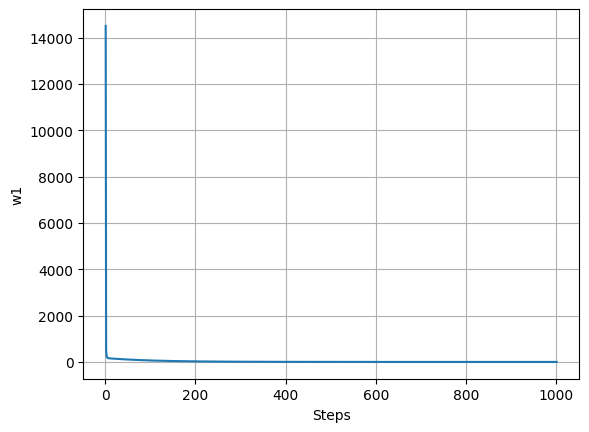

In [16]:
steps = np.arange(1, n_steps + 2) # Initialize our steps, it does n steps, 1 more because arange does 1 less, and another one because we count the initial conditions.
plt.plot(steps, cost_steps) # Plot the cost as a function of steps
format_plot('Steps', 'w1') # Format our graph accordingly

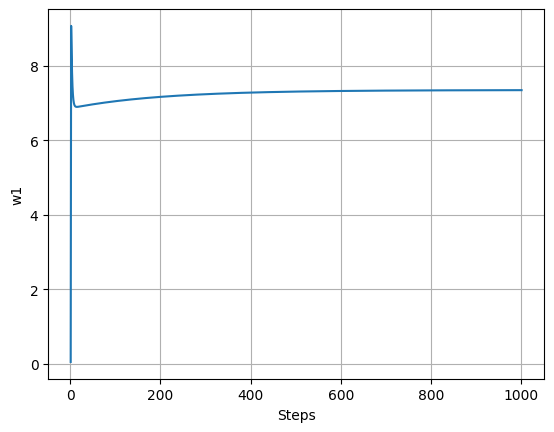

In [17]:
plt.plot(steps, w_steps[0]) # Plot w1 as a function of steps
format_plot('Steps', 'w1') # Format our graph accordingly

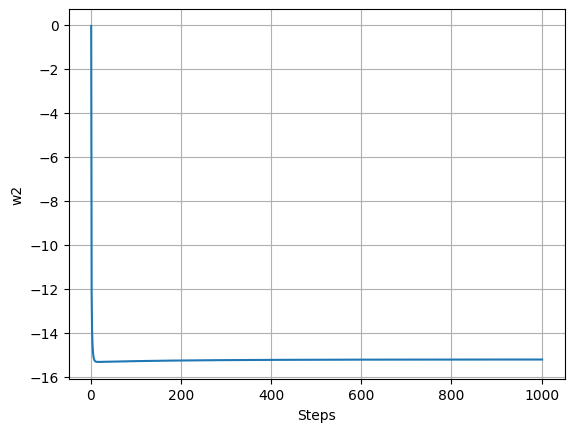

In [18]:
plt.plot(steps, w_steps[1]) # Plot w2 as a function of steps
format_plot('Steps', 'w2') # Format our graph accordingly

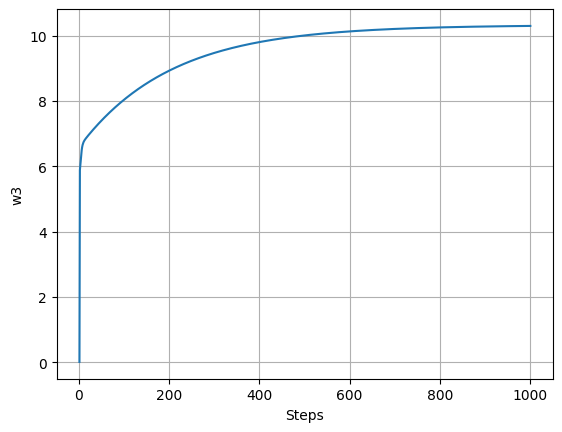

In [19]:
plt.plot(steps, w_steps[2]) # Plot w3 as function of steps
format_plot('Steps', 'w3') # Format our graph accordingly

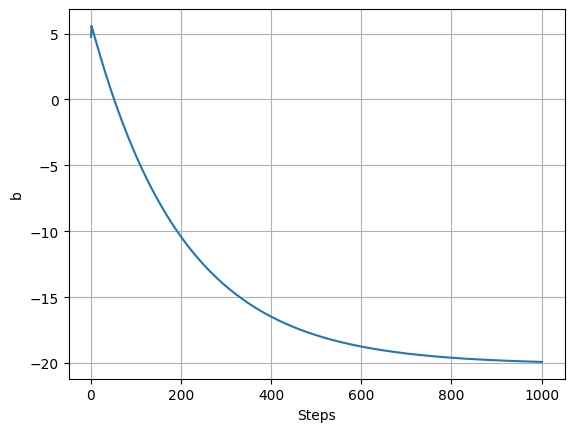

In [20]:
plt.plot(steps, b_steps) # Plot b as a function of steps
format_plot('Steps', 'b') # Format our graph accordingly

In [21]:
print(f" w1 = {w[0]}\n w2 = {w[1]}\n w3 = {w[2]}\n b = {b}") # Output the results

 w1 = 7.343561592257833
 w2 = -15.208112580495571
 w3 = 10.301884696712596
 b = -19.914241094727767


# Using sklearn

In [22]:
from sklearn.linear_model import LinearRegression # Import LinearRegression from sklearn

# We reshape z repeatdly when calling .fit(), solely because it requires for there to be arrays inside z (so we encapsulate every element of z in it's own array)

X = np.column_stack((x, y, t))  # Stack our matrice columns x, y, t (such that the coefficients extracted will be ordered w1, w2, w3)
model = LinearRegression()  # Create the model
model.fit(X, z)  # Fit the model

# The coefficients correspond to w1, w2, and w3 respectively
w1, w2, w3 = model.coef_
b = model.intercept_  # Our b intercept

# Output the values of w1, w2, w3, and b
print(f" w1 = {w1}\n w2 = {w2}\n w3 = {w3}\n b = {b}") # Output the results

 w1 = 7.347124532759855
 w2 = -15.207238817434604
 w3 = 10.329004589490408
 b = -20.102678587258893
